# Im gonna make the graph representations of the smiles molecules

In [49]:
#standard packages
import time
import torch
import pickle
import dill
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torch_geometric.nn import TAGConv
from torch.nn import Sequential, Linear, ReLU

#visualise graphs
import networkx as nx
from torch_geometric.utils import to_networkx

#loading data
import pandas as pd
import os

#turning smiles into GRaphs
from torch_geometric.utils import from_smiles
from torch_geometric.data import Data
from rdkit import Chem
from rdkit.Chem import Draw

## Loading data

In [3]:
#data path
data_path = "data/raw"

# Load train and test sets
train_df = pd.read_csv(os.path.join(data_path, "train.csv"))
test_df = pd.read_csv(os.path.join(data_path, "test.csv"))

### Exploring smiles

*OC(=O)CCCCCCCCC(=O)OC1COC2C(*)COC12
Data(x=[24, 9], edge_index=[2, 50], edge_attr=[50, 3], smiles='*OC(=O)CCCCCCCCC(=O)OC1COC2C(*)COC12')


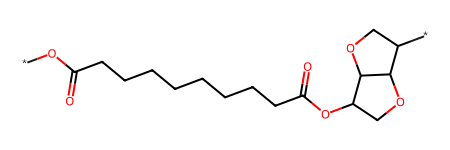

In [4]:
smiles_ex = train_df['SMILES'][5] # example from data set
print(smiles_ex)

# standard way to visualise the molecule
mol_pic = Chem.MolFromSmiles(smiles_ex)

#turn into specified data structure from smiles
data_ex = from_smiles(smiles_ex)

print(data_ex) 
mol_pic

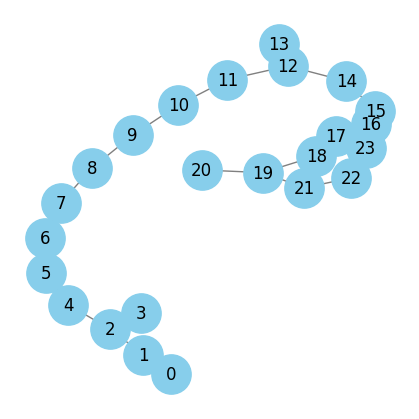

Ellipsis

In [5]:
# Visualise moelcules in graph way
def Vis_SMILES_G(data)->None:    
    G = to_networkx(data, to_undirected=True)

    plt.figure(figsize=(4,4))
    nx.draw(G, with_labels=True, node_color="skyblue", node_size=800, edge_color="gray")
    plt.show()
    return ...

Vis_SMILES_G(data_ex)

## General Mechanism
This built in function uses a commmonly used library known as RDKIT to turn smiles into molecules and then it is turned into a graph. From theRDKit library a lot of features node and edge wise are created immediatly. I just let the function caculate all of them.

### Understanding the features in the graph
Edges attr. Each bond has three features either 1 for single bond 2 for double bond 12 for aromatic bonds in the benzene ring.

Second column is for "stereochemistry / conjugation flag" means bond direction apperantly

Third column: aromatic flag. Just means if the molecule is in a benzene ring

In [6]:
# View edge attributes
data_ex.edge_attr

tensor([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 1],
        [1, 0, 1],
        [2, 0, 1],
        [1, 0, 0],
        [2, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [2, 0, 1],
        [1, 0, 1],
        [2, 0, 1],
        [1, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]])

### Molecule node features
Each of the pre built features is 9 features
- Feature1: Atomic number (H=1, C=6, O=8, etc., prob we should make one hot enc)
- Feature2: Chirality ( 1 if it is chiral, this if you mirror it stops being the same molecule. "think about how your hands look diffrentfrom eachother causethey are mirrored")
- Feature3: Degree of node
- Feature4: Formal Charge, (Charge estimated at that molecule)
- Feature5: Number of hydrogens attached
- Feature6: Hybridization (explains what type of sp orbital it has gives a number but we should make it one hot encoding )
- Feature7: Aromatic flag (is it aromatic bond, "deslocation of the bond", for us that usually means in a benzene ring)
- Feature8: Ring membership (is the atom part of a ring)

In [7]:
data_ex.x

tensor([[0, 0, 1, 5, 0, 0, 0, 0, 0],
        [8, 0, 2, 5, 0, 0, 3, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 0, 0],
        [8, 0, 1, 5, 0, 0, 3, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 0, 0],
        [8, 0, 1, 5, 0, 0, 3, 0, 0],
        [8, 0, 2, 5, 0, 0, 3, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [6, 0, 4, 5, 2, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [0, 0, 1, 5, 0, 0, 0, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1]])

Ill create a new column with all the converted graphs

In [8]:
train_df["graph"] = train_df["SMILES"].apply(from_smiles)

# Very Important!
These are polymers which are very long chains, the actual graph would be a ery long chain of our monomers (The smiles we are actually given). So I am creating here a small function that will produce the corresponding molecule for a set lenght. These small chains are called oligomers.

I haven't checked the following code if it is correct but it provides an output I will check robustness another day

In [9]:
from rdkit import Chem

def _neighbor_idx(mol, atom_idx):
    """Return the single neighbor index of a star atom."""
    nbrs = [n.GetIdx() for n in mol.GetAtomWithIdx(atom_idx).GetNeighbors()]
    if len(nbrs) != 1:
        raise ValueError(f"Star atom at idx {atom_idx} does not have exactly one neighbor.")
    return nbrs[0]

def SMILES_To_Oligomer(monomer_smiles: str, length: int, cap_ends: bool = True) -> str:
    """
    Build an oligomer SMILES by connecting monomer units at '*' with SINGLE bonds.
    First '*' in the SMILES string = HEAD, second '*' = TAIL.
    If cap_ends=True, terminal '*' atoms are removed (implicit H completes valence).
    """
    if monomer_smiles.count("*") != 2:
        raise ValueError("Monomer must have exactly 2 connection points [*].")

    # find positions of '*' in the SMILES string
    star_positions = [i for i, ch in enumerate(monomer_smiles) if ch == "*"]
    if len(star_positions) != 2:
        raise ValueError("Could not locate exactly 2 '*' in SMILES string.")

    # RDKit mol
    mono = Chem.MolFromSmiles(monomer_smiles)
    if mono is None:
        raise ValueError("Invalid monomer SMILES.")

    # collect star atom indices in same order as in SMILES string
    atoms = list(mono.GetAtoms())
    stars = [a.GetIdx() for a in atoms if a.GetSymbol() == "*"]

    # this mapping isn't guaranteed from RDKit, so we align with string order
    # pick the atom whose order in MolToSmiles matches the SMILES positions
    # simpler assumption: just treat the first in list as HEAD, second as TAIL
    head_star, tail_star = stars[0], stars[1]

    # Start oligomer
    oligomer = Chem.Mol(mono)
    open_end = tail_star  # grow from tail

    for _ in range(length - 1):
        mono2 = Chem.Mol(mono)
        stars2 = [a.GetIdx() for a in mono2.GetAtoms() if a.GetSymbol() == "*"]
        if len(stars2) != 2:
            raise ValueError("Attachment monomer lost its two '*' atoms.")
        head2, tail2 = stars2  # head2 = first star of new monomer, tail2 = second

        combined = Chem.CombineMols(oligomer, mono2)
        rw = Chem.RWMol(combined)
        offset = oligomer.GetNumAtoms()

        # indices inside combined
        open_star_idx = open_end
        head_idx = head2 + offset
        tail_idx = tail2 + offset

        # connect neighbor of open_end ↔ neighbor of head2
        n1 = _neighbor_idx(rw, open_star_idx)
        n2 = _neighbor_idx(rw, head_idx)
        rw.AddBond(n1, n2, Chem.BondType.SINGLE)

        # remove consumed stars
        for idx in sorted([open_star_idx, head_idx], reverse=True):
            rw.RemoveAtom(idx)

        # adjust tail_idx after deletions
        removed = sorted([open_star_idx, head_idx])
        for r in removed:
            if tail_idx > r:
                tail_idx -= 1

        oligomer = rw.GetMol()
        open_end = tail_idx  # carry forward the new tail

    if cap_ends:
        rw = Chem.RWMol(oligomer)
        end_stars = [a.GetIdx() for a in rw.GetAtoms() if a.GetSymbol() == "*"]
        for idx in sorted(end_stars, reverse=True):
            rw.RemoveAtom(idx)
        oligomer = rw.GetMol()

    Chem.SanitizeMol(oligomer)
    return Chem.MolToSmiles(oligomer)


def SMILES_To_Oligomer_Graph(monomer_smiles: str, length: int):
    oligo_smiles = SMILES_To_Oligomer(monomer_smiles, length, cap_ends=True)
    return from_smiles(oligo_smiles)


 Showing a simple example of the molecule vs its oligomer

Data(x=[22, 9], edge_index=[2, 46], edge_attr=[46, 3], smiles='O=C(O)CCCCCCCCC(=O)OC1COC2CCOC21')


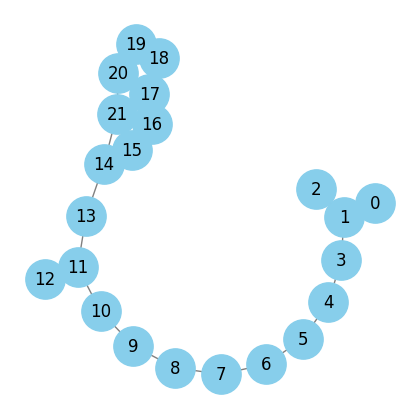

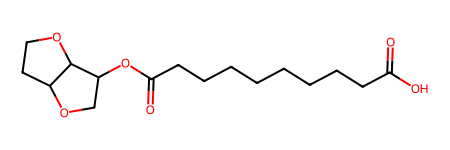

In [10]:
#Example
oligomer_ex = SMILES_To_Oligomer_Graph(smiles_ex, 1) # Generate graph data
print(oligomer_ex)
Vis_SMILES_G(oligomer_ex) # visualise graph form
mol_ex = Chem.MolFromSmiles(SMILES_To_Oligomer(smiles_ex, 1))
mol_ex # visualise in chemical formula for

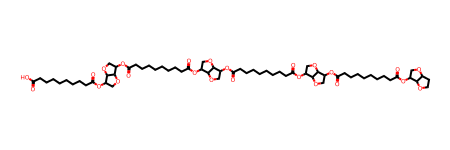

In [11]:
# Showing in alternative length form
mol_ex = Chem.MolFromSmiles(SMILES_To_Oligomer(smiles_ex, 4))
mol_ex

## 3D representations of SMILES 
Based on: https://arxiv.org/pdf/2306.15065. Covalent bonds can be restrictive in what they represent. We instead look at non-covalent, which capture more of the 3D structure of the molecule, as well as more obscure bonds (hydrogen bonds, van der Waals forces). 

In [80]:
from rdkit.Chem import AllChem
from torch_geometric.data import Data

x_map = {
    'chirality': [
        'CHI_UNSPECIFIED',
        'CHI_TETRAHEDRAL_CW',
        'CHI_TETRAHEDRAL_CCW',
        'CHI_OTHER',
        'CHI_TETRAHEDRAL',
        'CHI_ALLENE',
        'CHI_SQUAREPLANAR',
        'CHI_TRIGONALBIPYRAMIDAL',
        'CHI_OCTAHEDRAL',
    ],
    'hybridization': [
        'UNSPECIFIED',
        'S',
        'SP',
        'SP2',
        'SP3',
        'SP3D',
        'SP3D2',
        'OTHER',
    ],
}

atom_to_idx = {
    'C': 0,
    'O': 1,
    '*': 2,
    'N': 3,
    'F': 4,
    'S': 5,
    'Si': 6,
    'Cl': 7,
    'P': 8,
    'Br': 9,
    'H': 10,
    'Sn': 11,
    'Se': 12,
    'Na': 13,
    'Ge': 14,
    'B': 15,
    'Te': 16,
    'Cd': 17,
    'Ca': 18,
}

def non_covalent_graph(
    smile: str, 
    interval: list, 
    L: int = 1, 
    include_H: bool = True, 
    max_attempts: int = 10000, 
    seed: int = -1
):
    mol = Chem.MolFromSmiles(smile)
    mol = Chem.AddHs(mol)
    params = AllChem.ETKDGv3()
    params.maxIterations = 10000
    params.useRandomCoords = True
    params.randomSeed = seed
    
    attempt = 0
    while attempt < max_attempts:
        try:
            cid = AllChem.EmbedMolecule(mol, params)
            if cid != -1:
                break  
        except ValueError:
            pass  
        except RuntimeError:
            print(smile)
        attempt += 1
    else:
        raise RuntimeError(f'3D embedding failed after {max_attempts} attempts')
        
    if not include_H:
        mol = Chem.RemoveHs(mol)
    
    N = mol.GetNumAtoms()
    atoms = list(mol.GetAtoms())
    dist_matrix = np.zeros((N, N))
    dot_products = np.zeros((N, N))

    coords = mol.GetConformer().GetPositions()
    
    # compute distances
    for i, atom_i in enumerate(coords):
        for j, atom_j in enumerate(coords):
            dist_matrix[i, j] = np.linalg.norm(atom_i - atom_j)
            dot_products[i, j] = np.dot(atom_i, atom_j)
    
    # compute edges and edge_features     
    coo_edges = []
    edge_features = []
    for i in range(N):
        for j in range(N):
            if i != j and interval[0] <= dist_matrix[i, j] < interval[1]:
                coo_edges.append([i, j])
                
                features = []
                features.append(dist_matrix[i, j])
                features.append(dot_products[i, j])
                edge_features.append(features)

    # compute node features 
    node_features_basic = np.zeros((N, 13))
    for i in range(N):
        features = []
        features.append(coords[i][0])
        features.append(coords[i][1])
        features.append(coords[i][2])
        features.append(atoms[i].GetAtomicNum())
        features.append(atoms[i].GetTotalDegree()) # it might be nice to include Hs
        features.append(atoms[i].GetFormalCharge())
        features.append(x_map['hybridization'].index(str(atoms[i].GetHybridization())))
        features.append(int(atoms[i].GetIsAromatic()))
        features.append(atoms[i].GetTotalNumHs())
        features.append(int(atoms[i].IsInRing()))
        features.append(x_map['chirality'].index(str(atoms[i].GetChiralTag())))
        features.append(atoms[i].GetExplicitValence())
        features.append(atoms[i].GetMass())
        
        node_features_basic[i, :] = features
    
    # compute geometric node features
    node_features_geo = np.zeros((N, L * 19))
    points = np.linspace(interval[0], interval[1], L+1)
    subintervals = [(points[i], points[i+1]) for i in range(L)]
    
    for i in range(N):
        for j, subinterval in enumerate(subintervals):
            l = 19*j
            for m, atom_type in enumerate(list(atom_to_idx.keys())):
                int_count = 0
                for k in range(N):
                    atom_k = mol.GetAtomWithIdx(k).GetSymbol()
                    if atom_k == atom_type and subinterval[0] <= dist_matrix[i, j] < subinterval[1]:
                        int_count += 1

                node_features_geo[i, l+m] = int_count
                
    node_features = np.concat((node_features_basic, node_features_geo), axis=-1)
    coo_edges = np.array(coo_edges).T
    edge_features = np.array(edge_features)
    
    mol.RemoveAllConformers()
    
    return Data(
        x=torch.from_numpy(node_features).float(),
        edge_index=torch.tensor(coo_edges, dtype=torch.long).contiguous(),
        edge_attr=torch.from_numpy(edge_features).float(),
        pos=torch.from_numpy(coords).float()
    )


In [81]:
train_df["graphs_[2A_4A]"] = train_df["SMILES"].apply(non_covalent_graph, args=([2, 4],))

*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)=O
*CC(C)S(*)(=O)

KeyboardInterrupt: 

In [51]:
test_df["graphs_[2A_4A]"] = test_df["SMILES"].apply(non_covalent_graph, args=([2, 4],))
test_df["graphs_[2A_4A]"] = test_df["SMILES"].apply(non_covalent_graph, args=([4, 6],))
test_df["graphs_[2A_4A]"] = test_df["SMILES"].apply(non_covalent_graph, args=([6, 8],))
test_df["graphs_[2A_4A]"] = test_df["SMILES"].apply(non_covalent_graph, args=([8, 100000],)) # technically its inf but this should work

with open('data/processed/test_processed.pl', 'wb') as f:
    dill.dump(test_df, f)

In [14]:
from collections import Counter
atom_counter = Counter()

for smi in train_df['SMILES']:
    mol = Chem.MolFromSmiles(smi)
    if mol:  
        for atom in mol.GetAtoms():
            atom_counter[atom.GetSymbol()] += 1

most_common_atoms = atom_counter.most_common()
print("Most common atoms:")
for atom, count in most_common_atoms:
    print(f"{atom}: {count}")


Most common atoms:
C: 207681
O: 27981
*: 15968
N: 13143
F: 5720
S: 1442
Si: 551
Cl: 342
P: 298
Br: 182
H: 96
Sn: 7
Se: 6
Na: 6
Ge: 5
B: 2
Te: 1
Cd: 1
Ca: 1


In [85]:
mol_ex = Chem.MolFromSmiles('*CC(C)S(*)(=O)=O')
mol_ex = Chem.AddHs(mol_ex)
params = AllChem.ETKDGv3()
params.maxIterations = 10000
Chem.AllChem.EmbedMolecule(mol_ex, params)
mol_ex_block = Chem.MolToMolBlock(mol_ex)
conf = mol_ex.GetConformer()
coords = np.array([list(conf.GetAtomPosition(i)) for i in range(mol_ex.GetNumAtoms())])

RuntimeError: Invariant Violation
	bad lower bound
	Violation occurred on line 183 in file Code\GraphMol\DistGeomHelpers\BoundsMatrixBuilder.cpp
	Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
	RDKIT: 2025.09.1
	BOOST: 1_85


In [16]:
mol_ex.GetConformer().GetPositions().shape

(48, 3)

In [17]:
mol_ex_block = Chem.MolToMolBlock(mol_ex)
print(mol_ex_block)


     RDKit          3D

 48 49  0  0  0  0  0  0  0  0999 V2000
    6.6060   -0.6094    3.2333 R   0  0  0  0  0  0  0  0  0  0  0  0
    6.6569    0.0168    2.6663 O   0  0  0  0  0  0  0  0  0  0  0  0
    6.4328   -0.3601    1.3302 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.1829   -1.5926    1.1634 O   0  0  0  0  0  0  0  0  0  0  0  0
    6.4918    0.6307    0.2488 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2323    0.7265   -0.5819 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.8364   -0.5254   -1.2845 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.5723   -0.3874   -2.1109 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.3660    0.0100   -1.3027 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0192   -0.9472   -0.2243 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8112   -0.4931    0.5342 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4265   -0.3564   -0.3259 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5320    0.0967    0.5889 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3382    0.2879    1